# CODE 2기 자유주제 프로젝트



## 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd

# 데이터 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 머신러닝 라이브러리
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **주제**


### <**Drug Consumption Classification**을 통한 국내 마약 실태 및 해결책 모델 제시>

## **분석개요**

### 분석 목적


<img src="./images/big5.png" alt="drawing" width="400"/>

**1. 어떤 성향의 사람들이 약물에 취약한가?**

 - 우리가 분석하고자 하는 데이터셋(Excel 파일)에는 설문자별 빅파이브성격모델(예민성, 성실성, 외향성, 우호성, 개방성), SS(감각 ) 등의 수치데이터가 담겨있다.\
 일정한 기준에 따라 설문자들을 구분한 후 약물에 취약한 사람들이 어떠한 특성이 강한지 분석한다.

 - *이러한 과정을 거치는 이유*: 국내 마약 사범의 수가 매우 빠르게 증가하고 있고, 특히 성장기인 청소년기의 연령대에서 마약 중독자가 기하급수적으로 늘어나고 있다.\ 해당 문제에 대한 원인을 분석하기 위해 다음 과정이 필요하다.


  **2. 중독성이 강한 상위의 마약으로 가는 매커니즘이 어떻게 되는가?**

  - 마약에도 중독 위험도에 따라 높은 마약 낮은 마약이 있다. 우리는 공식 자료를 참고하여 마약별 위험도를 분류하였고,약물에 중독된 집단과 덜 중독된 집단간의 비교군 분석 및 시각화를 통해 약물 중독을 막기 위한 대안을 따져보는 기틀을 확립한다.

  - *이러한 과정을 거치는 이유*: 현재 한국에는 국내 마약에 관한 데이터가 매우 부족하고, 특히 어떤 마약이 중독성이 강하고 쎈지, 중독 위험도는 어떠한지에 관한 데이터가 많이 없다. 따라서 우리가 해당 자료를 만들어봄으로써 기초자료를 생성해보는 작업을 가져보고자 한다.

  **3. 마약을 이겨내는 사람들의 주요한 특징은 무엇인가?**

  - 마약에 손댄것은 돌이킬 수 없기 때문에 중독 정도가 어느정도이든 다시는 손대지 않도록 이겨내는 것 또한 중요하다. 따라서 설문자별 마약 각각의 마지막 복용 시기가 나타난 자료를 통해 마약을 오랫동안 하지 않은 사람들만 추출해 이들의 특성을 분석하는 작업을 수행한다.

  - *이러한 과정을 거치는 이유*: 현재 국내에는 마약중독센터를 비롯해서 다양한 방식의 상담원과 단약원이 있다. 그러나 이들을 보조해주는 전문 치료 강사와 체계적인 시스템이 선진국들에 비해 부족한 실정이다. 따라서 개인의 특성에 따라 맞춤형 치료 시스템을 개발하고 이용하는데 있어 해당 과정이 도움이 될 것으로 예상된다.    

### 분석 배경 및 필요성
*   최근 대한민국에서는 마약 사범이 급증하고 있는 추세입니다. 마약 범죄는 공공 안전, 건강, 경제 등 여러 방면에 걸쳐 심각한 문제를 야기하며, 이에 대한 대응이 시급한 상황입니다. 그러나, 마약을 사용하는 수요자에 대한 연구는 상대적으로 미비하여, 마약 사용의 근본 원인과 그에 따른 대책 마련에 어려움을 겪고 있습니다. 이러한 연구 부족은 마약 문제를 효과적으로 해결하기 위한 맞춤형 전략 수립에 한계를 초래하고 있습니다.

*   마약 사용자의 특성과 행동 패턴을 이해하는 것은 마약 문제 해결에 있어 매우 중요한 요소입니다. 이를 통해 우리는 여러 가지 이점을 얻을 수 있습니다. 
    1. 마약 사용자의 특성을 이해함으로써, 효과적인 예방 전략을 개발할 수 있습니다. 이는 특정 인구 집단을 대상으로 한 맞춤형 교육 및 홍보 캠페인을 통해 이루어질 수 있습니다. 
    2. 마약 사용자의 행동 패턴을 분석하여, 보다 효과적인 치료 및 재활 프로그램을 설계할 수 있습니다. 이는 재범률을 낮추고, 마약 중독으로부터의 회복을 촉진하는 데 도움이 됩니다. 
    3. 마약 사용에 대한 심층적인 연구는 정책 입안자들이 더 나은 법률과 규제를 제정하는 데 중요한 역할을 합니다. 이를 통해 마약 범죄를 억제하고, 사회적 비용을 절감할 수 있습니다. 
    4. 마약 사용자의 행동을 예측함으로써, 경찰과 기타 공공 안전 기관은 보다 효율적으로 자원을 배치하고, 마약 범죄를 예방할 수 있습니다.

*   본 연구의 목표는 대한민국 내 마약 사용자의 특성과 행동 패턴을 분석하여, 마약 문제 해결을 위한 근거 기반의 데이터를 제공하는 것입니다. 이를 위해 성별, 나이, 교육 수준, 성격 특성 등 다양한 변수들을 분석하여 마약 사용자의 프로파일을 작성하고, 행동 패턴을 이해하여 특정 그룹이 마약에 취약한 이유를 파악합니다. 또한, 다양한 머신러닝 모델을 활용하여 마약 사용자 예측 모델을 개발하고 이를 검증합니다.

*   본 연구를 통해 얻어진 결과는 여러 가지 효과를 기대할 수 있습니다.
    1. 마약 사용자 특성에 기반한 예방 및 개입 프로그램을 개발함으로써, 마약 사용률을 줄이는 데 기여할 수 있습니다. 
    2. 정책 입안자들에게 실질적인 데이터와 분석 결과를 제공하여, 효과적인 마약 관련 정책을 수립하는 데 도움이 됩니다. 
    3. 마약 범죄를 예방하고, 사회적 안정과 공공 안전을 증진시킬 수 있습니다. 이를 통해 대한민국의 마약 문제를 해결하고, 보다 건강하고 안전한 사회를 구현하는 데 기여할 것입니다.

---
## **분석 상세 내용**

### 분석 데이터

## 데이터 불러오기 및 파악

In [2]:
# 데이터 읽어오기
raw_df = pd.read_csv('./data/Drug_Consumption.csv')

# 결측치 확인
print(f"결측치 개수: {raw_df.isnull().sum().sum()}개 입니다.")

결측치 개수: 0개 입니다.


## 데이터 탐색: EDA (Exploratory Data Analysis)

![Data Process](./images/variables.png)

#### 데이터를 독립변수와 종속변수로 분리

In [3]:
# 데이터의 독립변수와 종속변수를 분리
drug_list = raw_df.columns[13:]

raw_X = raw_df.drop(drug_list, axis=1)
raw_Y = raw_df[drug_list]

### 데이터 분포 시각화

#### 독립변수 (범주형 피쳐)

In [4]:
# 독립변수 중 범주형 컬럼 리스트로 출력
categorical_columns = raw_X.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity'], dtype='object')


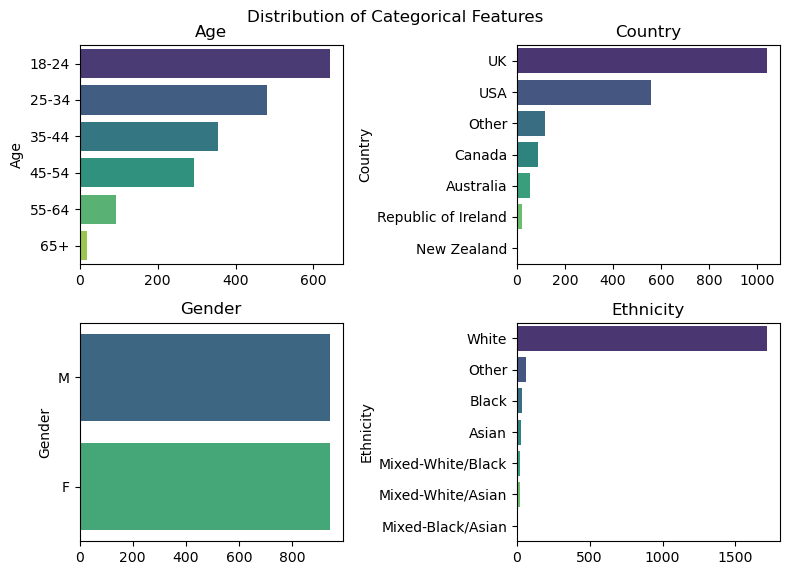

In [5]:
# 범주형 독립변수 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes = axes.flatten()
for i, col in enumerate(['Age', 'Country', 'Gender', 'Ethnicity']):
    ax = axes[i]
    sns.countplot(y=col, data=raw_X, ax=ax, hue=col, order=raw_X[col].value_counts().index, hue_order=raw_X[col].value_counts().index, palette='viridis')
    ax.set_title(col)
    ax.set_xlabel('')
    
plt.suptitle('Distribution of Categorical Features', y=0.95)

plt.tight_layout()
plt.show()

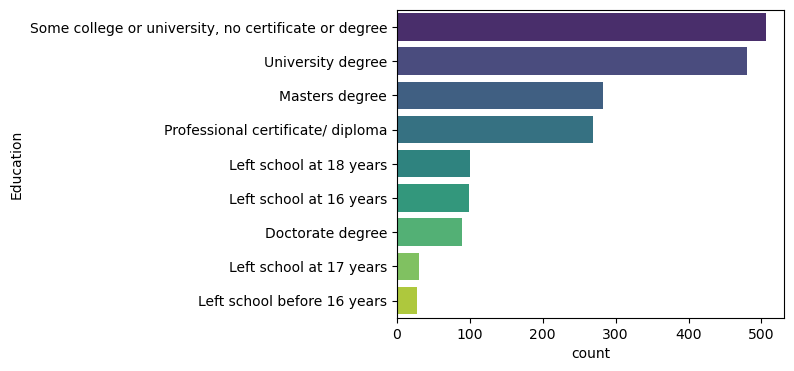

In [6]:
plt.figure(figsize=(5, 4))
sns.countplot(y='Education', data=raw_X, hue='Education', order=raw_X['Education'].value_counts().index, hue_order=raw_X['Education'].value_counts().index, palette='viridis')
plt.show()

### 독립변수 (수치형 피쳐)

In [7]:
# 독립변수 중 수치형 컬럼 리스트로 출력
numerical_columns = raw_X.select_dtypes(include='float').columns
print(numerical_columns)

Index(['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS'], dtype='object')


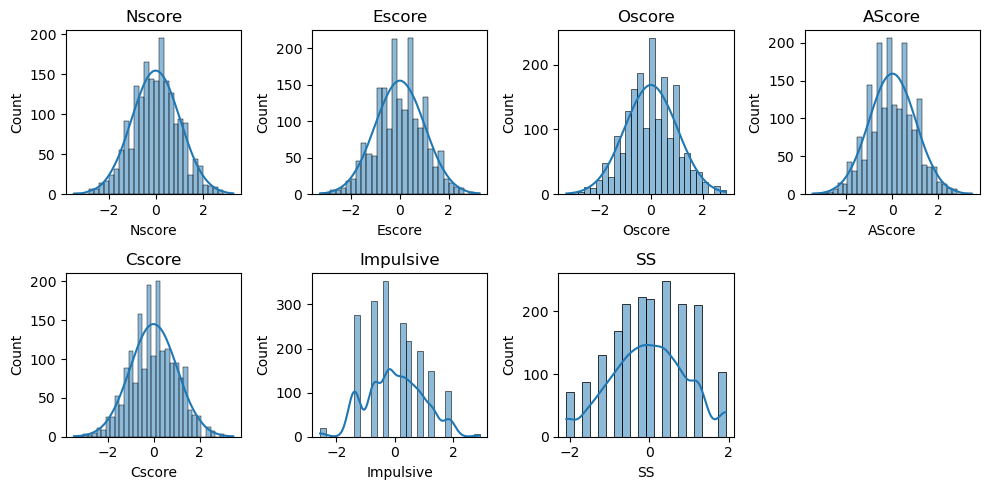

In [8]:
# 수치형 독립변수 분포 시각화
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(raw_X[col], ax=ax, kde=True)
    ax.set_title(col)
    
axes[7].set_visible(False)
    
plt.tight_layout()
plt.show()

### 종속 변수
#### 약물 종류
|Column Name|Drug|Column Name|Drug|
|---|---|---|---|
|**Amphet**| 암페타민|**Heroin**| 헤로인 |
|**Amyl**| 아밀 나이트라이트 |**Ketamine**| 케타민 |
|**Benzos**| 벤조디아제핀 |**Legalh**| 합법적 환각제 |
|**Caff**| 카페인 |**LSD**| LSD |
|**Cannabis**| 마리화나(대마) |**Meth**| 메타돈 |
|**Choc**| 초콜릿 |**Mushroom**| 환각 버섯 |
|**Coke**| 코카인 |**Nicotine**| 니코틴 |
|**Crack**| 크랙 코카인 |**Semer**| 허구의 약물 세메론 (즉, 대조군) | 
|**Ecstasy**| 엑스터시 |**VSA**| 휘발성 물질 남용 |

#### 약물 사용 여부
![CL Description](./images/CL_scale.png)

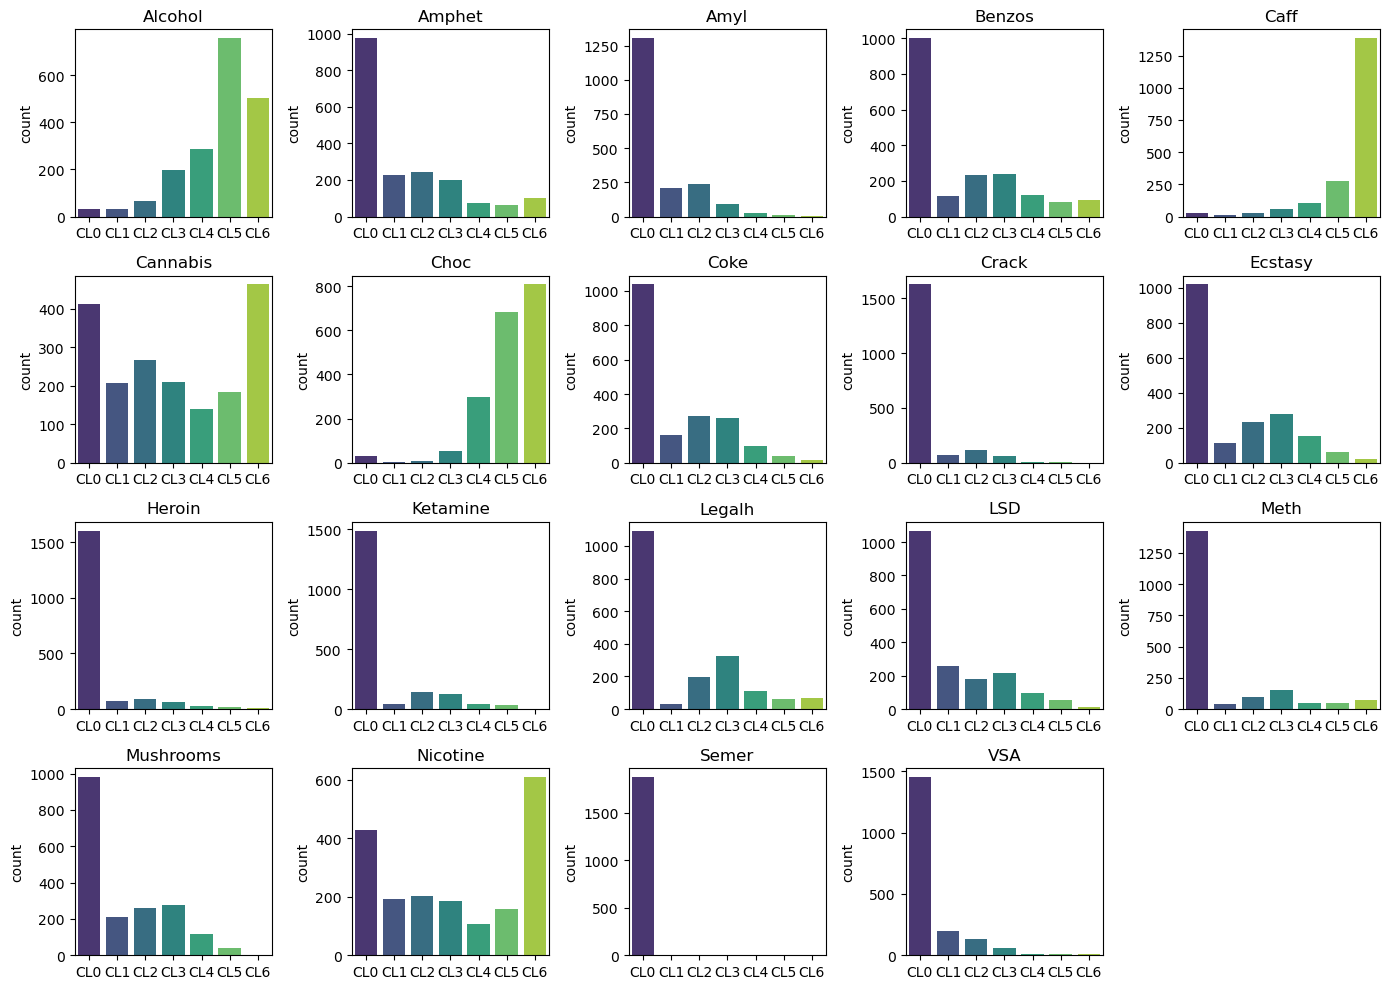

In [9]:
# 데이터 시각화를 위한 figure와 axes 생성
fig, axes = plt.subplots(4, 5, figsize=(14, 10))

# axes를 1차원으로 flatten
axes = axes.flatten()
for i, drug in enumerate(drug_list):
    # 현재 subplot의 axes 선택
    ax = axes[i]
    # 현재 subplot에 countplot 그리기
    sns.countplot(x=drug, data=raw_Y, ax=ax,
                  order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
                  # 색상 설정 (viridis)
                  hue=drug, palette='viridis',
                  hue_order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
        
    # 현재 subplot의 title 설정
    ax.set_title(drug)
    ax.set_xlabel('')
    
# 필요없는 subplot 지우기
axes[19].set_visible(False)

# 그래프 간 간격 조정
fig.tight_layout()
plt.show()

### 의심되는 데이터 제거

In [10]:
# Semer의 데이터 분포 확인
raw_Y['Semer'].value_counts()

Semer
CL0    1876
CL2       3
CL3       2
CL1       2
CL4       1
Name: count, dtype: int64

Semer는 가상약물이기 때문에 Semer에 대한 대답이 'CL0'이 아닌 샘플들은 모두 배제하도록 하겠습니다.

In [11]:
# Semer 데이터중 CL0이 아닌 데이터의 index 추출
remove_idx = raw_Y[raw_Y['Semer'] != 'CL0'].index

# X, Y에서 해당 index 제거
X = raw_X.drop(remove_idx).reset_index(drop=True)
Y = raw_Y.drop(remove_idx).reset_index(drop=True)

# Semer 컬럼 제거
Y = Y.drop('Semer', axis=1)

# 사용하지 않는 ID 컬럼 제거
X.drop('ID', axis=1, inplace=True)

## 수치형 데이터로 변형
### 종속변수

In [12]:
# 종속변수를 수치형 데이터로 변형
Y_quantified = Y.replace({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

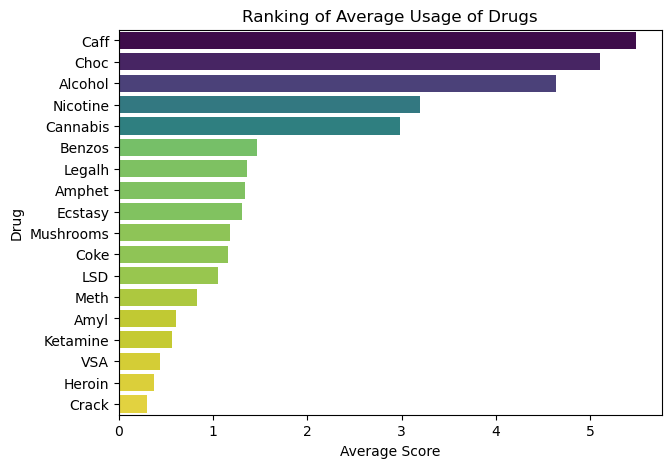

In [13]:
# 약물 별 평균 점수 시각화
drug_mean = Y_quantified.mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=drug_mean.values, y=drug_mean.index, hue=drug_mean.values, palette='viridis_r')

plt.title('Ranking of Average Usage of Drugs')
plt.xlabel('Average Score')
plt.ylabel('Drug')
plt.legend([],[], frameon=False)

plt.show()

#### 약물간 사용여부 상관계수 확인

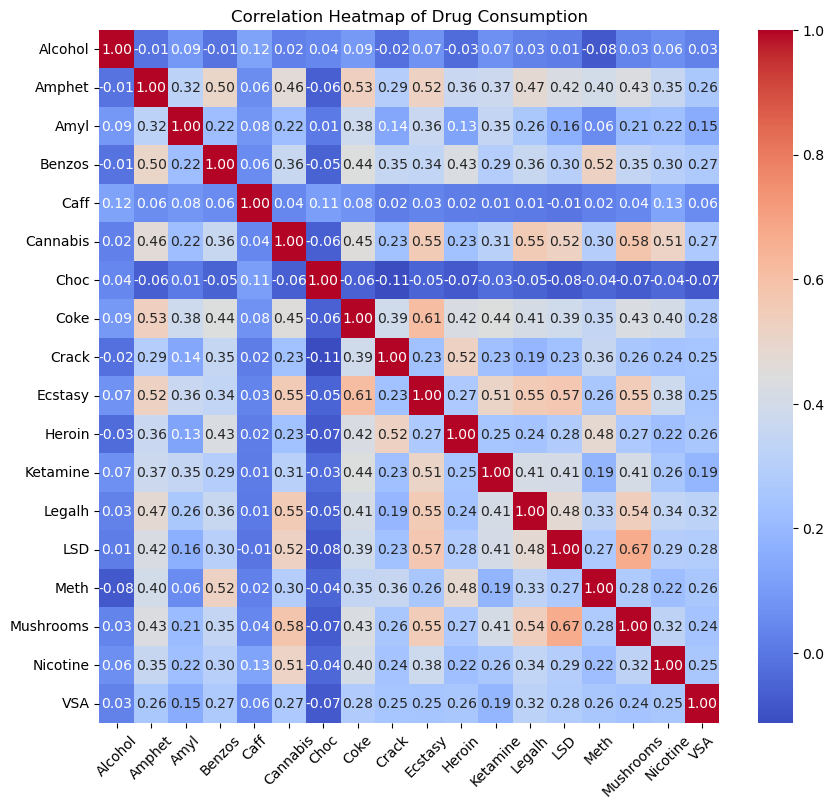

In [14]:
# Create correlation heatmap for y
plt.figure(figsize=(10, 9))
sns.heatmap(Y_quantified.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap of Drug Consumption')
plt.show()

알코올, 카페인, 초콜릿에 대한 답변은 다른 약물들과의 상관관계가 확연히 낮은 것을 볼 수 있습니다.

그러므로 해당 약물들은 다른 약물 사용과 큰 관계가 없는 것으로 볼 수 있습니다.

In [15]:
# 약물 복용 여부와 상관관계가 낮은 컬럼 분류 및 제거
less_correlated = ['Alcohol', 'Caff', 'Choc']
Y_important = Y.drop(less_correlated, axis=1)
Y_important_q = Y_quantified.drop(less_correlated, axis=1)

### 독립변수

#### 범주형 변수 인코딩 처리
Age, Gender, Education, Country, Ethnicity를 인코딩 해주겠습니다.

- Age, Education 피쳐들은 비록 범주형이지만 범주간의 관계가 정보를 나타냅니다. (Ordinal Encoding)

- Gender 컬럼은 M/F 밖에 없음으로 간단하게 0/1로 변환해 주겠습니다. (Replacement Encoding)

- Country, Ethnicity 피쳐들은 범주간의 관계가 따로 없습니다. (One Hot Encoding)

In [16]:
X_encoded = X.copy()

# 1. Ordinal Encoding을 사용하여 Age, Education 컬럼 변환
age_OE = OrdinalEncoder(categories=[['18-24', '25-34', '35-44', '45-54', '55-64', '65+']])
X_encoded['Age'] = age_OE.fit_transform(X_encoded[['Age']])

edu_OE = OrdinalEncoder(categories=[['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years', 'Left school at 18 years', 
                                     'Some college or university, no certificate or degree', 'Professional certificate/ diploma', 
                                     'University degree', 'Masters degree', 'Doctorate degree']])
X_encoded['Education'] = edu_OE.fit_transform(X_encoded[['Education']])

# 2. Gender 컬럼 변환 (M-> 0, F-> 1)
X_encoded['Gender'] = X_encoded['Gender'].map({'M': 0, 'F': 1})

X_encoded_no_ce = X_encoded.drop(['Country', 'Ethnicity'], axis=1)

# 3. One Hot Encoding을 사용하여 Country, Ethnicity 컬럼 변환
one_hot_encoder = OneHotEncoder(sparse_output=False)
X_encoded = pd.concat([X_encoded, pd.DataFrame(one_hot_encoder.fit_transform(X_encoded[['Country', 'Ethnicity']]), 
                                               columns=one_hot_encoder.get_feature_names_out(['Country', 'Ethnicity'])
                                               )], axis=1)
X_encoded.drop(['Country', 'Ethnicity'], axis=1, inplace=True)

In [17]:
X_encoded.head()

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,1.0,0,8.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0,5.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1,7.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,1,8.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,1,3.0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# 지금까지 정리한 데이터를 저장
pd.concat([X_encoded, Y], axis=1).to_csv('./data/drug_consumption_preprocessed.csv', index=False)

---
### 분석툴 및 분석 알고리즘

1. 분석 툴 (Tools)

##### 데이터 분석에 사용한 파이썬 라이브러리 :

**NumPy:** 고성능 수치 계산을 위해 사용.

**Pandas:** 데이터 조작과 분석을 위한 강력하고 유연한 데이터 구조와 함수들을 사용하기 위해 사용.

**Matplotlib.pyplot:** 다양한 종류의 그래프와 플롯을 생성하고 시각화하기 위해 사용.

**Seaborn:** 통계적 데이터 시각화를 위한 고급 그래프를 그리기 위해 사용.

**Scikit-learn (sklearn):** 머신러닝 모델을 구축하고 평가하기 위한 다양한 알고리즘과 도구를 사용하기 위해 사용.

---

## **분석 코드**


## 질문 1: 어떤 성향의 사람들이 약물에 취약한가?

#### 개인의 평균 약물 취약 계수 계산
다른 약물과의 상관관계가 낮은 알코올, 초콜릿, 카페인을 제외한 나머지 약물들의 CL점수 평균을 계산하여 예측 목표값 (y)로 사용하겠습니다.

In [19]:
# 샘플별로 수치형 종속변수의 평균 계산
df = pd.concat([X, Y_important_q.mean(axis=1)], axis=1)
df.rename(columns={0: 'anti_resistance_index'}, inplace=True)

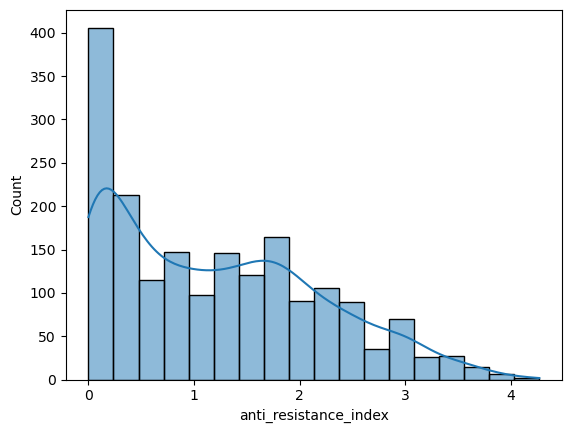

In [20]:
# 저항력 지표 분포 시각화
sns.histplot(df['anti_resistance_index'],kde=True)
plt.show()

#### 약물 취약 계수에 따른 범주화

In [21]:
# 평균 중독 지수를 범주형 변수로 나눠주는 함수
def convert_sum(x):
    if 0 <= x < 1:
       return 'very_rare_pois'
    elif 1 <= x < 1.58:
       return 'rare_pois'
    elif 1.58 <= x < 2.26:
        return 'aver_pois'
    elif x >= 2.26:
        return 'often_pois'
    
df['cate_poi'] = df['anti_resistance_index'].apply(convert_sum)

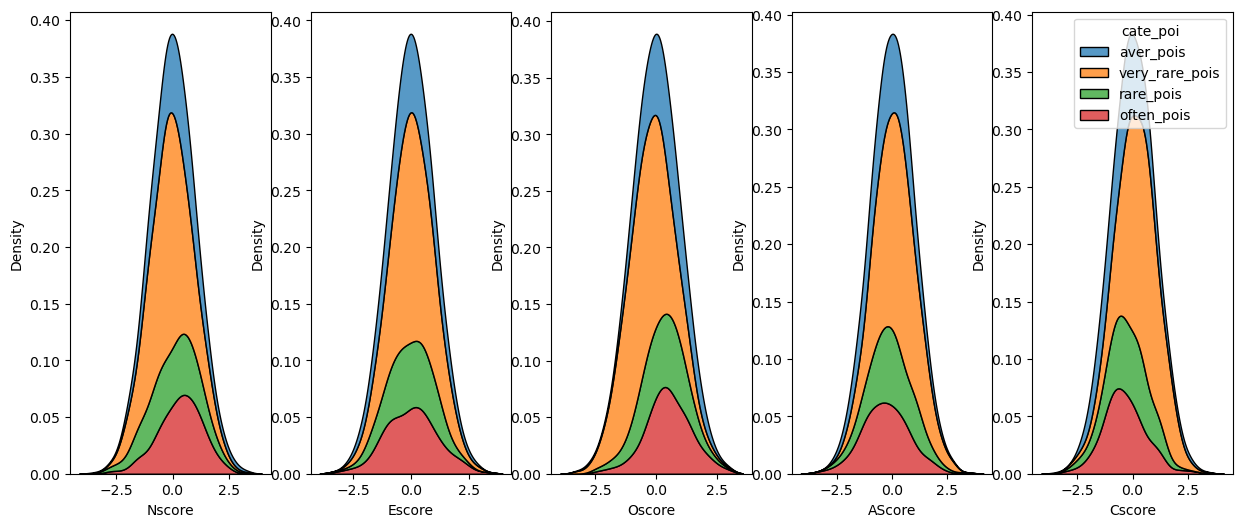

In [22]:
# 성격 특성 별 중독 지수 분포 시각화
big_five = ['Nscore','Escore','Oscore','AScore','Cscore']

fig,axes = plt.subplots(1,5,figsize=(15,6))

for i, personality in enumerate(big_five):
    sns.kdeplot(x=personality, hue='cate_poi', data=df, multiple='stack', ax=axes[i])
    if i != 4:
        # remove legend
        axes[i].get_legend().remove()

plt.show()

#### 1. 어떤 성향의 사람들이 마약에 취약한가??

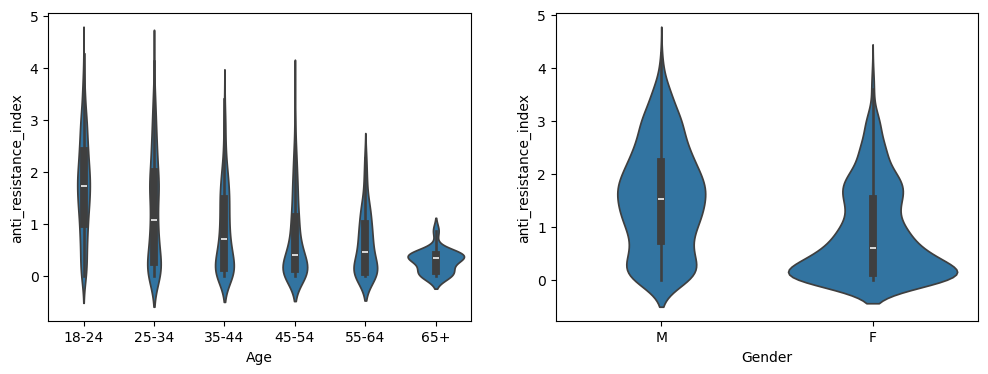

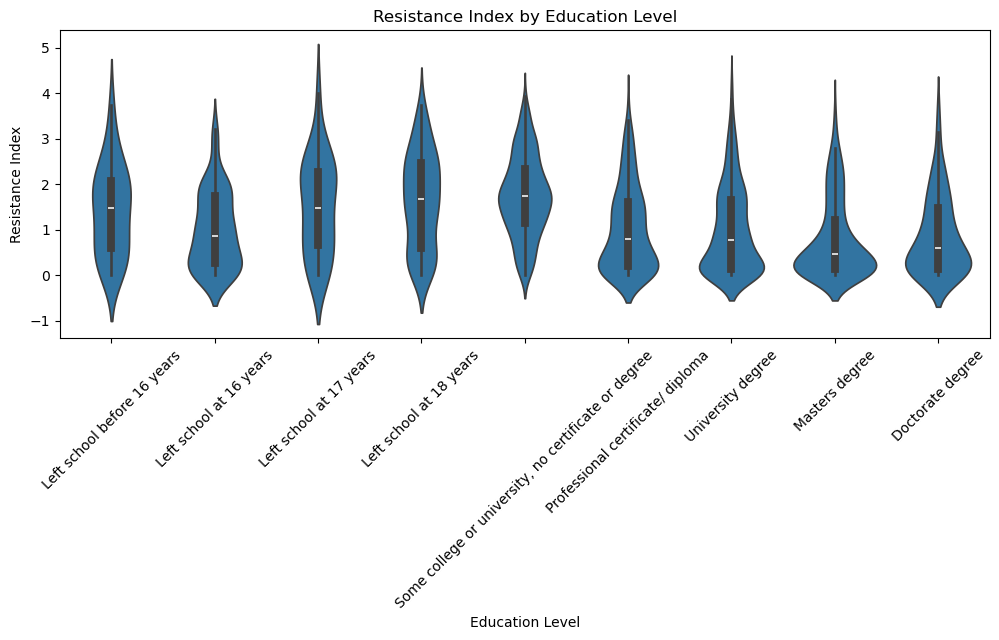

In [23]:
# 나이, 성별, 교육 수준 별 중독 지수 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.violinplot(x='Age', y='anti_resistance_index', data=df, 
               order=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], ax=axes[0])
sns.violinplot(x='Gender', y='anti_resistance_index', data=df, ax=axes[1])
plt.show()

plt.figure(figsize=(12, 4))
sns.violinplot(x='Education', y='anti_resistance_index', data=df,
               order=['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years', 'Left school at 18 years',
                      'Some college or university, no certificate or degree', 'Professional certificate/ diploma',
                      'University degree', 'Masters degree', 'Doctorate degree'])
plt.title('Resistance Index by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Resistance Index')
plt.xticks(rotation=45)
plt.show()

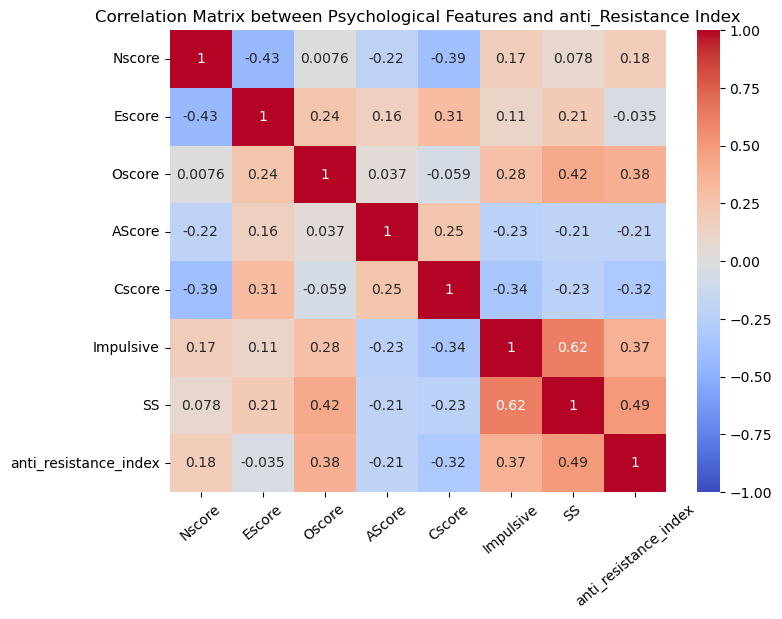

In [24]:
# 심리적 특성과 저항력 지표 간의 상관관계
psychological_features = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
correlations = df[psychological_features + ['anti_resistance_index']].corr()

# 상관 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Psychological Features and anti_Resistance Index')
plt.xticks(rotation=40)
plt.show()


### 모델 생성

In [25]:
df['anti_resistance_index'].describe() # 평균 1.21

count    1876.000000
mean        1.208458
std         0.984731
min         0.000000
25%         0.333333
50%         1.066667
75%         1.866667
max         4.266667
Name: anti_resistance_index, dtype: float64

In [26]:
# 종속 변수 생성 (# 저항지수가 1.20보다 크면 1을 반환: 약물에 약함)
y_resistance = df['anti_resistance_index'].apply(lambda x: 1 if x >= 1.21 else 0)

# Train, Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_resistance, test_size=0.3, random_state=42, stratify=y_resistance)

In [27]:
# RandomizedSearchCV를 위한 하이퍼파라미터 설정
params = {
    'n_estimators': np.arange(25, 201, 25),
    'max_features': np.arange(1, 11),
    'min_samples_split': np.arange(2, 8),
    'min_samples_leaf': np.arange(1, 5)
}

# RandomizedSearchCV 수행
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), params, cv=5, n_jobs=-1, n_iter=100, random_state=42, verbose=1)
rand_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
rand_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 125,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 3}

## 결과 해석

In [28]:
# 최적의 모델로 예측
best_rf = rand_search.best_estimator_
best_rf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_test_pred = best_rf.predict(X_test)

# 모델의 검증 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

# Confusion Matrix 출력
pd.DataFrame(confusion_matrix(y_test, best_rf.predict(X_test)), index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])

Test Accuracy: 0.7779751332149201
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       306
           1       0.75      0.77      0.76       257

    accuracy                           0.78       563
   macro avg       0.78      0.78      0.78       563
weighted avg       0.78      0.78      0.78       563



,Predicted 0,Predicted 1
True 0,241,65
True 1,60,197


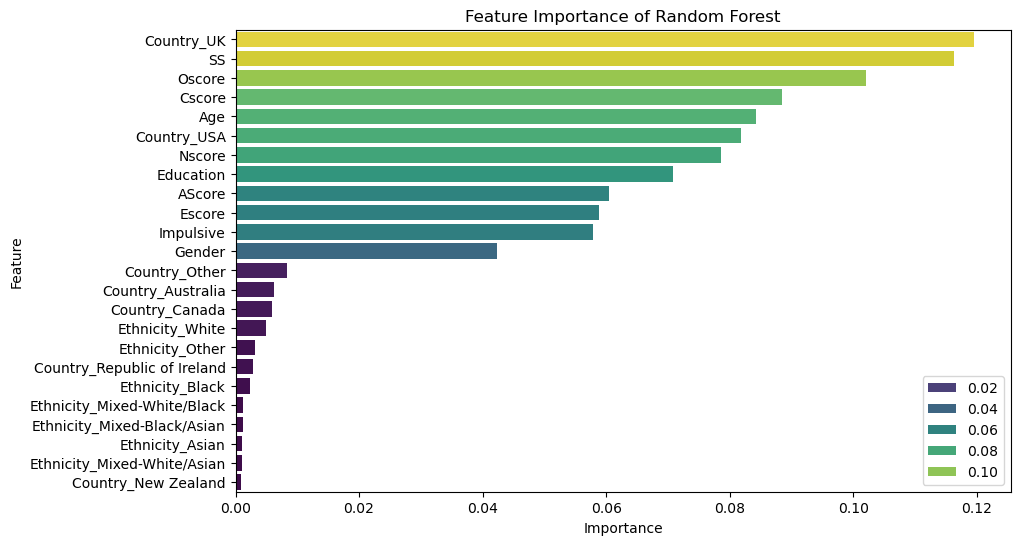

In [29]:
# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=X_encoded.columns, 
            order=X_encoded.columns[np.argsort(best_rf.feature_importances_)[::-1]], 
            hue=best_rf.feature_importances_,
            hue_order=best_rf.feature_importances_[np.argsort(best_rf.feature_importances_)[::-1]],
            palette='viridis')

plt.title('Feature Importance of Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

### 시사점
* 그 외로는 감각 추구(SS), 개방성(Oscore), 성실성(Cscore), Age(나이), Nscore(신경증) 순으로 분류 모델의 중요성을 가집니다.

* 인종 및 영국, 미국을 제외한 국적들은 상대적으로 중요성이 낮게 나타났습니다.\
이는 인종적 차이가 약물 반응에 상대적으로 덜 중요한 역할을 할 수 있음을 시사합니다.\
또한 샘플의 대부분이 미국과 영국에 있는 백인이란 점을 고려하면 해당 컬럼들을 제거하고 보는 것도 의미가 있을 듯 합니다.

* 의외로 Country_UK, 즉 영국 시민인지 아닌지가 큰 변수로 작용한 것을 볼 수 있습니다. 왜 그런지 나라별로 데이터를 다시 시각화 해보겠습니다.

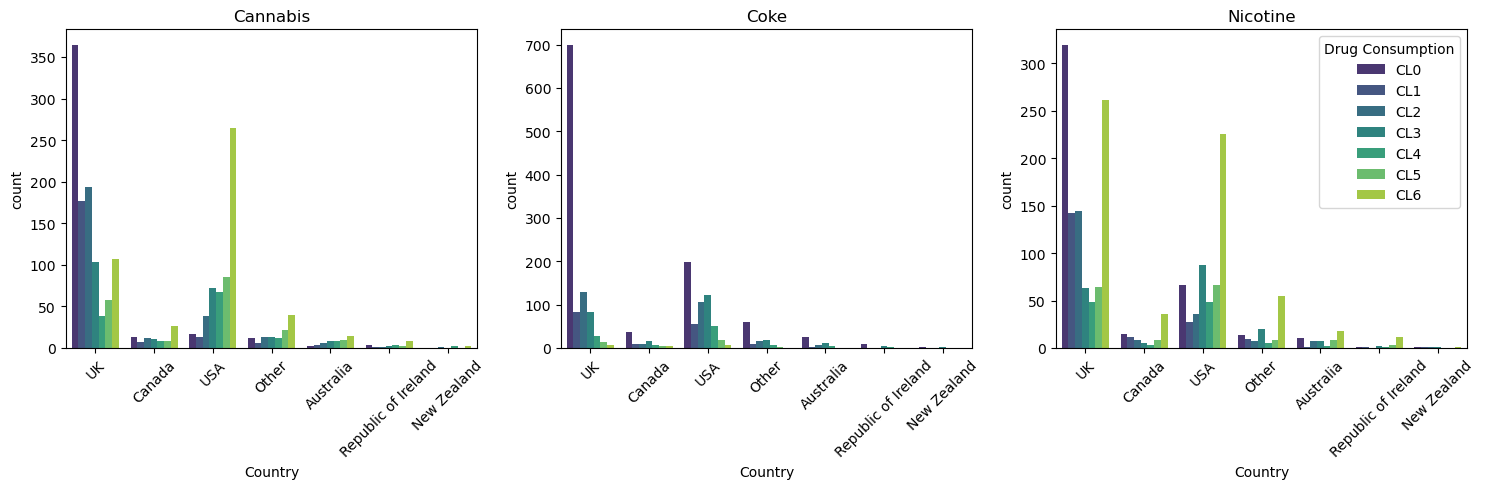

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 대표 약물 세개 (Cannabis, Coke, Nicotine)에 대한 분포 시각화
for i, column in enumerate(['Cannabis', 'Coke', 'Nicotine']):
    sns.countplot(x="Country", data=raw_df, hue=column, hue_order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
                  palette='viridis', ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].get_legend().remove()
    
# 주석 추가
axes[2].legend(loc='upper right', title='Drug Consumption')

plt.tight_layout()
plt.show()

##### **영국에선 대마초가 불법**

여기선 시각적 편의상 3개 밖에 표시를 안 했지만, 약물 별로 나라별 분포를 비교해본 결과 대마초 (Cannabis)만 유독 영국과 다른 나라들 간에 큰 차이를 보이는데 이는  영국에선 대마초가 불법이기 때문입니다. 그러한 요인이 영국의 피쳐 중요도를 높이는 것 같습니다.

### 나라 및 인종 컬럼을 제거하고 모델 학습

In [31]:
# RandomizedSearchCV를 위한 하이퍼파라미터 설정
params = {
    'n_estimators': np.arange(25, 201, 25),
    'max_features': np.arange(1, 11),
    'min_samples_split': np.arange(2, 8),
    'min_samples_leaf': np.arange(1, 5)
}

# 나라 및 인종을 제외한 데이터로 학습
X_train, X_test, y_train, y_test = train_test_split(X_encoded_no_ce, y_resistance, test_size=0.3, random_state=42)

# RandomizedSearchCV 수행 (RandomForestClassifier 사용)
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), params, cv=5, n_jobs=-1, n_iter=100, random_state=42, verbose=1)
rand_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
rand_search.best_params_

# 최적의 모델로 예측
best_rf = rand_search.best_estimator_
best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(max_features=2, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=50, random_state=42)

In [32]:
# 최적의 모델로 예측
best_rf = rand_search.best_estimator_
best_rf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_test_pred = best_rf.predict(X_test)

# 모델의 검증 성능을 평가합니다.
accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

# Confusion Matrix 출력
pd.DataFrame(confusion_matrix(y_test, best_rf.predict(X_test)), index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])

Test Accuracy: 0.7779751332149201
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       310
           1       0.75      0.76      0.75       253

    accuracy                           0.78       563
   macro avg       0.78      0.78      0.78       563
weighted avg       0.78      0.78      0.78       563



,Predicted 0,Predicted 1
True 0,246,64
True 1,61,192


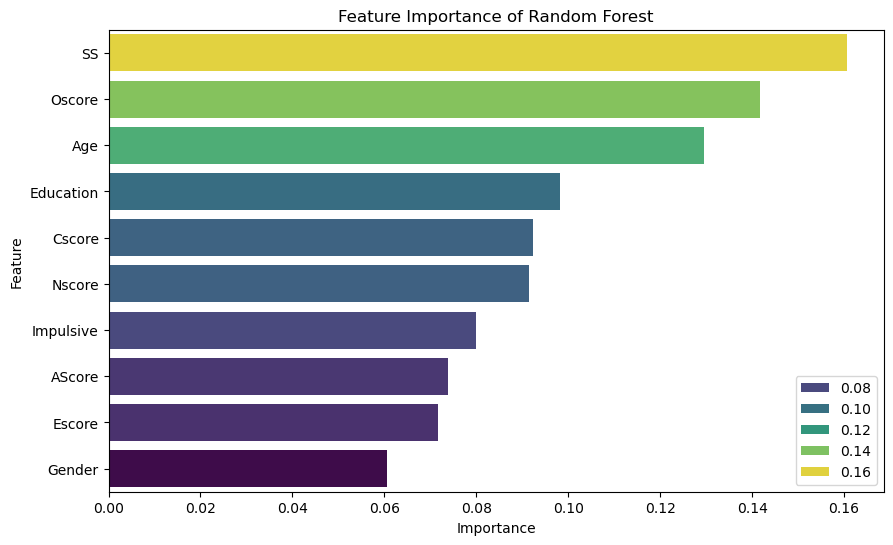

In [33]:
# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=X_encoded_no_ce.columns, 
            order=X_encoded.columns[np.argsort(best_rf.feature_importances_)[::-1]], 
            hue=best_rf.feature_importances_,
            hue_order=best_rf.feature_importances_[np.argsort(best_rf.feature_importances_)[::-1]],
            palette='viridis')

plt.title('Feature Importance of Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

### 시사점
*Country를 제거한 후, SS가 가장 중요한 피처로 나타났습니다.*
*   성격 점수 중에선 개방성(Oscore)이 가장 높은 중요도를 가집니다.

*   나이(Age)와 교육 수준(Education)이 다른 성격 검사들 보다 높은 중요도를 가집니다.

통합적 해석
*   감각 추구(SS)는 두번 다 매우 중요한 피처로 나타났습니다. 이는 사람들이 약물에 반응하는 방식에 있어 감각 추구 성향이 가장 큰 역할을 한다는 것을 시사합니다.

*   성격 점수는 두번 다 O, C, N, A, E 순으로 높은 중요도를 가졌습니다. 이중 특히 개방성(Oscore)과 성실성(Cscore)는 두가지 모델에서 다 높은 중요도를 가졌습니다.

* 성별과 충동 지수는 그다지 높은 중요도를 보여주지 않았습니다.\
이는 약물 사용은 성별을 가리지 않으며, 저희가 처음에 예상했던 것과 달리, 약물 사용여부는 단순히 그 사람의 충동성에 의존하지 않는다는 점입니다.

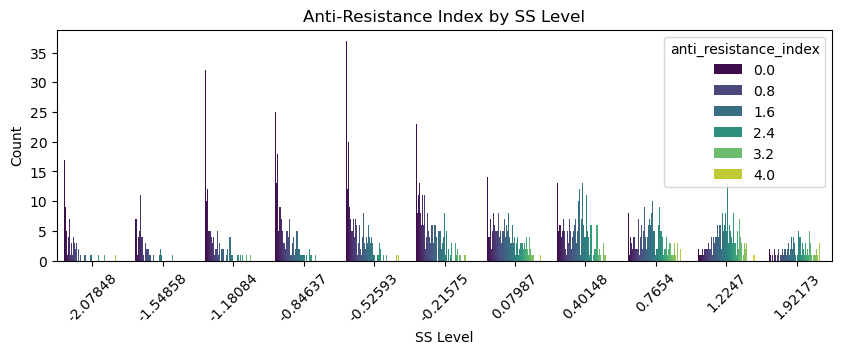

In [34]:
# 충동성과 저항력 지표 간의 관계
plt.figure(figsize=(10, 3))
sns.countplot(x='SS', hue='anti_resistance_index', data=df, palette='viridis')
plt.title('Anti-Resistance Index by SS Level')
plt.xlabel('SS Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

실제로 감각 추구(SS) 지수별로 데이터의 분포를 확인했을 때, SS가 높을 수록 약물 취약 계수의 분포가 오른쪽으로 치우치는 것을 볼 수 있습니다.

---

## 질문 2: 샘플들을 군집화하여 약물 사용 패턴을 분석 및 예측할 수 있을까?
이전에 약물 사용 여부 상관관계 그래프를 보면 특정 약물들끼리 강한 상관관계를 나타내는 것을 볼 수 있습니다.

이런 약물 사용 패턴을 군집화하여 정의한 다음 해당 군집들에 대해서 머신러닝모델이 얼마나 정확하게 예측할 수 있는지 확인해 보겠습니다.

### 각 사람 별 사용해본 약물 개수를 계산

In [35]:
# y의 열 중 CL1~6의 개수를 계산
y_num_used_drug = Y_important.apply(lambda x: x.isin(['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']).sum(), axis=1)

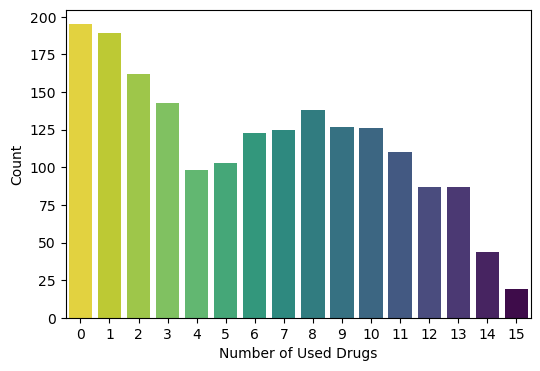

In [36]:
# y_num_used_drug의 분포 시각화
plot_arr = y_num_used_drug.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=plot_arr.index, y=plot_arr.values, hue=plot_arr.index, palette='viridis_r', legend=False)
plt.xlabel('Number of Used Drugs')
plt.ylabel('Count')
plt.show()

### 군집화

In [37]:
# KMeans 알고리즘을 사용하여 클러스터링을 수행
num_clusters = 4  # 4개의 클러스터로 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(Y_important_q)

# 클러스터 결과를 데이터프레임에 추가
Y_important_q['Cluster'] = clusters

# PCA를 사용하여 2차원으로 축소 (시각화를 위함)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(Y_important_q.drop(columns=['Cluster']))

# 각 클러스터별 각 약물별 사용 평균을 계산
cluster_averages = Y_important_q.groupby('Cluster').mean()

c:\Users\YuHan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


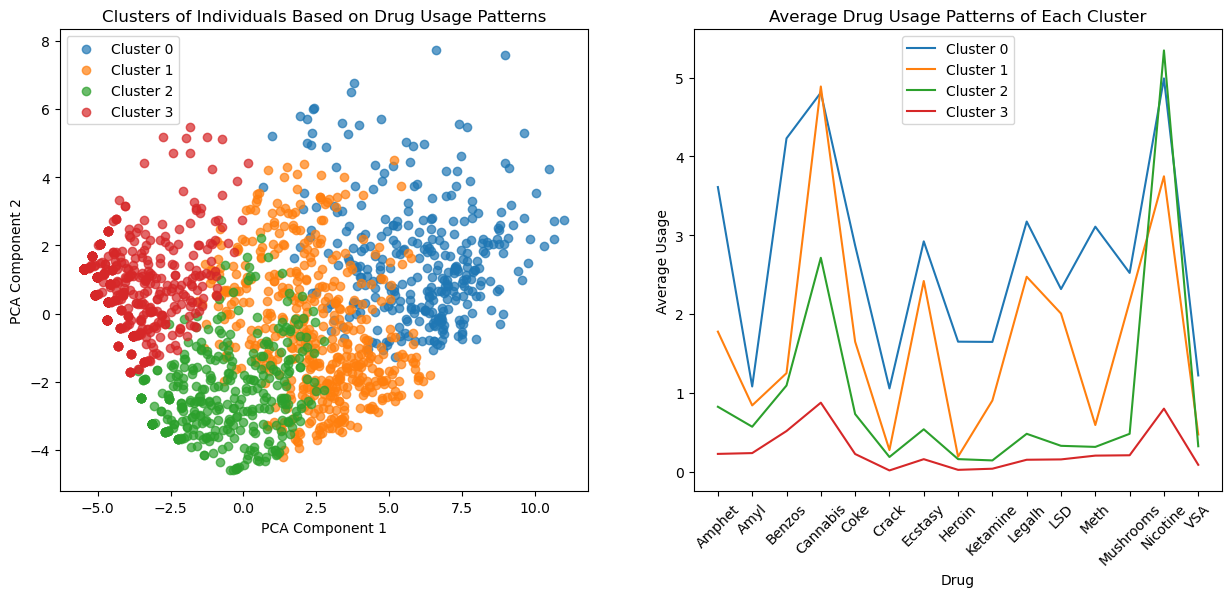

In [38]:
# Cluster한 결과를 바탕으로 각 클러스터의 특징을 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for cluster in range(num_clusters):
    # In plot 0, visualize the clusters according to the PCA components
    axes[0].scatter(pca_components[clusters == cluster, 0], pca_components[clusters == cluster, 1], label=f'Cluster {cluster}', alpha=0.7)
    axes[1].plot(cluster_averages.columns, cluster_averages.loc[cluster], label=f'Cluster {cluster}')

axes[0].set_title('Clusters of Individuals Based on Drug Usage Patterns')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].legend()

axes[1].set_title('Average Drug Usage Patterns of Each Cluster')
axes[1].set_xlabel('Drug')
axes[1].set_ylabel('Average Usage')
axes[1].set_xticks(range(len(cluster_averages.columns)))
axes[1].set_xticklabels(cluster_averages.columns, rotation=45)
axes[1].legend()

plt.show()

### 군집 별 약물 사용 평균

테이블은 각 클러스터 내에서 각 약물의 평균 사용 패턴을 보여줍니다. 이러한 평균에 기반하여 각 클러스터가 무엇을 나타내는지 요약한 내용은 다음과 같습니다:

- **클러스터 A:**
  - 거의 모든 약물의 사용이 매우 낮음.
  - 이 클러스터는 약물을 거의 사용하지 않는 개인들을 나타냅니다.

- **클러스터 B:**
  - 대마초와 니코틴의 중간 정도 사용.
  - 다른 약물의 사용은 낮음.
  - 이 클러스터는 가끔씩 약물을 사용하는 개인들을 나타냅니다.

- **클러스터 C:**
  - 대마초의 높은 사용과 상대적으로 높은 엑스터시, LSD, 니코틴 사용.
  - 이 클러스터는 특히 대마초와 환각제를 많이 사용하는 개인들을 나타냅니다.

- **클러스터 D:**
  - 대마초, 코카인, 케타민, LSD, 메타돈, 니코틴 등 여러 약물의 매우 높은 사용.
  - 이 클러스터는 다양한 약물을 광범위하게 사용하는 개인들을 나타냅니다.

  이 새로운 클러스터 분류를 타겟값(y)로 사용하여 머신러닝 모델을 돌려보겠습니다.

### 모델 생성

In [39]:
# Train, Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_important_q['Cluster'], test_size=0.2, random_state=42)

RandomizedSearchCV를 사용하여 최적의 하이퍼파라미터를 구하고, 해당 하이퍼파라미터로 모델을 구축하겠습니다.

In [40]:
# RandomizedSearchCV를 위한 하이퍼파라미터 설정
params = {
    'n_estimators': np.arange(25, 201, 25),
    'max_features': np.arange(1, 11),
    'min_samples_split': np.arange(2, 8),
    'min_samples_leaf': np.arange(1, 5)
}

# RandomizedSearchCV 수행 (RandomForestClassifier 사용)
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), params, cv=5, n_jobs=-1, n_iter=100, random_state=42, verbose=1)
rand_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
rand_search.best_params_

# 최적의 모델로 예측
best_rf = rand_search.best_estimator_
best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(max_features=4, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

## 결과 해석

In [41]:
# Train, Test 정확도 출력
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
test_acc = accuracy_score(y_test, best_rf.predict(X_test))

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Confusion Matrix 출력
pd.DataFrame(confusion_matrix(y_test, best_rf.predict(X_test)), index=[f'Actual {i}' for i in range(num_clusters)], columns=[f'Predicted {i}' for i in range(num_clusters)])

Train Accuracy: 0.9473
Test Accuracy: 0.5691


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,23,28,2,3
Actual 1,21,51,7,21
Actual 2,3,16,7,41
Actual 3,4,10,6,133


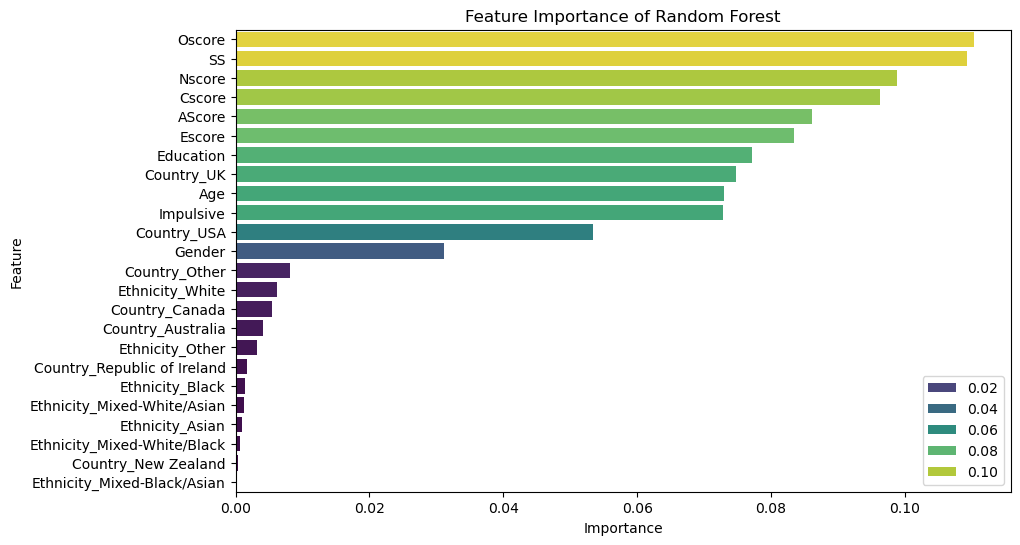

In [42]:
# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=X_encoded.columns, 
            order=X_encoded.columns[np.argsort(best_rf.feature_importances_)[::-1]], 
            hue=best_rf.feature_importances_,
            hue_order=best_rf.feature_importances_[np.argsort(best_rf.feature_importances_)[::-1]],
            palette='viridis')

plt.title('Feature Importance of Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

### 시사점
군집화를 진행했을 때, 4가지 특성의 약물 사용 패턴을 확인할 수 있었습니다.

머신러닝 모델을 돌려 예측했을 때, OScore (경험에 대한 개방성) 그리고 SS (감각 추구성)이 큰 중요도를 가지고 있다는 것을 볼 수 있습니다.

다만, 모델의 정확도가 0.57로 좋지 않게 나오지 않은 것을 볼 수 있습니다.

이는 적합한 모델이 아니거나, 아직 튜닝이 덜 됬기 때문일 수도 있지만, 군집화를 했을 때 군집끼리의 겹치는 부분이 많아 분류가 어렵기 때문일 수도 있습니다.

그러므로 이 데이터만을 통해서 약물 사용 패턴과 사람들의 개인 성격 특성과의 관계를 단정짓기에는 한계가 있습니다.

---
## 질문 3: 마약을 이겨내는 사람들의 주요 특징은 무엇인가?
약물을 1년 내에 사용한 사람들과, 1년 내에 복용하지 않은 사람들로 그룹을 나누어,\
두개의 그룹엔 어떤 차이가 있는지, 그리고 어떤 특성이 중요한지를 머신러닝 모델을 사용하여 알아보도록 하겠습니다.

가장 사용자가 많았던 Nicotine, Cannabis, 그리고 Amphetamine에 대하여 분석을 진행해 보겠습니다.

In [43]:
try: 
    Y_important_q = Y_important_q.drop('Cluster', axis=1)
except:
    pass

# 특정 약물을 안 사용해본 샘플 index 추출
def remove_never_used(drug):
    cl0_only = Y_important_q[Y_important_q[drug] == 0].index
    
    # X, Y에서 해당 index 제거
    X_temp = X_encoded_no_ce.drop(cl0_only).reset_index(drop=True)
    Y_temp = Y_important_q.drop(cl0_only).reset_index(drop=True)
    
    # 최근 1년간 약물 사용 여부
    y_used_drug_within_year = Y_temp[drug] > 2
    print(y_used_drug_within_year.value_counts())
    
    return X_temp, y_used_drug_within_year

### 모델 생성

In [44]:
# 학습하고 예측하는 함수 (피쳐 중요도를 반환)
def train_evaluate(X, y, test_size=0.3):
    
    # Train, Test 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # RandomizedSearchCV를 위한 하이퍼파라미터 설정
    params = {
        'n_estimators': np.arange(25, 201, 25),
        'max_features': np.arange(1, 11),
        'min_samples_split': np.arange(2, 8),
        'min_samples_leaf': np.arange(1, 5)
    }

    # RandomizedSearchCV 수행
    rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), params, cv=5, n_jobs=-1, n_iter=100, random_state=42, verbose=1)
    rand_search.fit(X_train, y_train)
    
    # 최적의 모델로 예측
    best_rf = rand_search.best_estimator_
    best_rf.fit(X_train, y_train)

    # 테스트 데이터로 예측
    y_test_pred = best_rf.predict(X_test)

    # 모델의 검증 성능을 평가하여 출려합니다.
    accuracy = accuracy_score(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    print(f"Test Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")
    
    return best_rf.feature_importances_

In [45]:
feature_importances = {}
for drug in ['Nicotine', 'Cannabis', 'Amphet']:
    X_temp, y_used_drug_within_year = remove_never_used(drug)
    feature_importances[drug] = train_evaluate(X_temp, y_used_drug_within_year)

Nicotine
True     1053
False     395
Name: count, dtype: int64
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test Accuracy: 0.7471264367816092
Classification Report:
              precision    recall  f1-score   support

       False       0.57      0.29      0.39       119
        True       0.78      0.92      0.84       316

    accuracy                           0.75       435
   macro avg       0.67      0.61      0.61       435
weighted avg       0.72      0.75      0.72       435

Cannabis
True     991
False    473
Name: count, dtype: int64
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test Accuracy: 0.7772727272727272
Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.54      0.61       142
        True       0.80      0.89      0.84       298

    accuracy                           0.78       440
   macro avg       0.75      0.72      0.73       440
weighted avg       0.77      0.78    

## 결과 해석

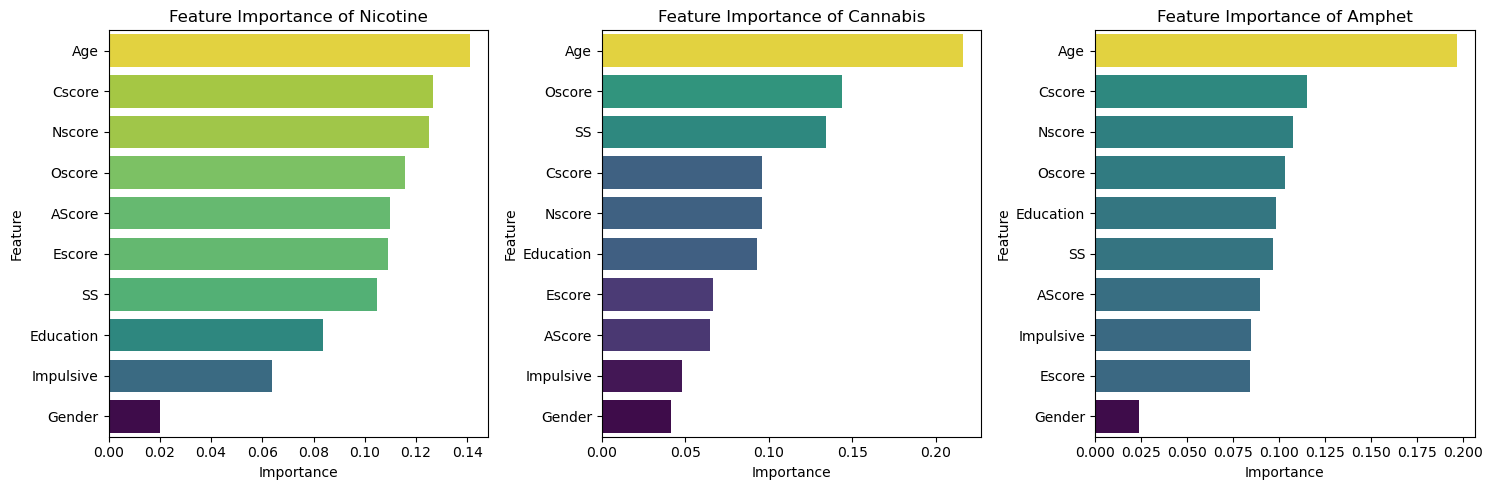

In [46]:
# Feature Importance 시각화
figure, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (drug, importance) in enumerate(feature_importances.items()):
    sns.barplot(x=importance, y=X_encoded_no_ce.columns, 
                order=X_encoded_no_ce.columns[np.argsort(importance)[::-1]], 
                hue=importance,
                hue_order=importance[np.argsort(importance)[::-1]],
                palette='viridis', ax=axes[i])
    
    axes[i].set_title(f'Feature Importance of {drug}')
    axes[i].set_xlabel('Importance')
    axes[i].set_ylabel('Feature')
    axes[i].get_legend().remove()

plt.tight_layout()
plt.show()

### 시사점
비록 Nicotine, Cannabis, Amphetamine 세개 약물에 대해서만 모델링 및 피쳐 중요도 연구를 진행했지만,\
이미 이 세가지 약물만 본다 하더라도 약물 별로 마약의 중독성에서 벗어나는데 중요하게 작용한 요인에 차이가 있다는 것을 볼 수 있습니다.

이는 새로운 관점을 시사합니다. 우리는 "마약 중독"을 하나의 큰 카테고리로 묶기 일수인데,\
마약 중독 치료를 진행할때 모든 마약류를 똑같이 대할 것이 아니라, 중독된 약물에 따라서 치료사가 포커스를 맞춰야되는 성격 기준이 다름을 의미합니다.

## **활용방안 및 기대효과**


### 활용방안

위의 시사점을 기반으로 맞춤형 교육 및 예방 프로그램 개발, 상담 및 치료, 관련 정책 개발 등에 활용할 수 있습니다.

### 기대효과

마약은 강한 중독성과 함께 개인의 건강 뿐 아니라 범죄 발생률 증가, 사회 질서의 붕괴까지 여러 문제를 야기할 수 있습니다. \
따라서 개인 맞춤형, 집중화 된 관리가 필요합니다. 

위의 분석을 통해 개인 맞춤형 관리가 이루어진다면 보다 효과적으로 마약 남용을 관리할 수 있을 것이라고 기대됩니다. 

효과적인 마약 남용 관리는 사회적 비용이 절감과 함께 사회 질서 유지, 정신 겅간 증진 등으로 이어지도록 기대할 수 있습니다.

## **참고 문헌 출처**

1. The five most addictive substances on Earth – and what they do to your brain
(theconversation.com)\
(https://theconversation.com/the-five-most-addictive-substances-on-earth-and-what-they-do-to
your-brain-54862)

2. What is the Most Addictive Drug? Here Are the Top 5 Substances
   (americanaddictioncenters.org)\
   (https://americanaddictioncenters.org/adult-addiction-treatment-programs/most-addictive)

3. The 10 Most Addictive Drugs in the World (addictiongroup.org)\
 (https://www.addictiongroup.org/blog/most-addictive-drugs/)\
 https://m.blog.naver.com/badsofu/222149558863

4. 끊기힘든 니코틴과 알코올…CNN "중독성 강한 약물" - 머니투데이 (mt.co.kr)\
 (https://news.mt.co.kr/mtview.php?no=2019010318088215157)

5. 세상에서 가장 위험한 중독 물질 5 - 코메디닷컴 (kormedi.com)\
 (https://kormedi.com/1260329/%EC%84%B8%EC%83%81%EC%97%90%EC%84%9C-%EA%B0%80%EC%9E%A5-%EC%9C%84%ED%97%98%ED%95%9C-%EC%A4%91%EB%8F%85-%EB%AC%BC%EC%A7%88)

6. Drug Consumption Classification(Kaggle-MEXWELL) \
   https://www.kaggle.com/datasets/mexwell/drug-consumption-classification